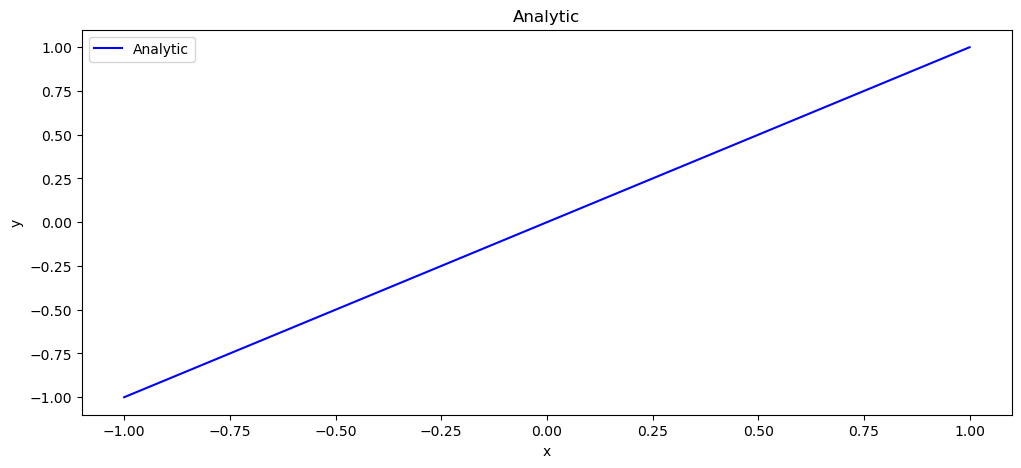

In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

# f_true = lambda x: np.sin(x)
# f_true = lambda x: x**2 + x
f_true = lambda x: x

n = 100

X_train = np.linspace(-1,1,n)

Y_train = np.array([f_true(xt) for xt in X_train])


# Plotting
plt.figure(figsize=(12, 5))
plt.plot(X_train, Y_train, label="Analytic", color="blue")


plt.title(f"Analytic")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# fig_name = f"c1_pce_{n}p{degree}d"
# plt.savefig('figs/'+fig_name)
plt.show()


In [10]:
import chaospy as cp
# Define the range of the input
# q_pce = cp.Normal(0, 1)
q_pce = cp.Uniform(-1, 1)

# Create an orthogonal polynomial basis
degree = 4 # Degree of the polynomial
polynomials_pce = cp.orth_ttr(degree, q_pce)

# Fit the PCE model to the data
pce_model_cp = cp.fit_regression(polynomials_pce, X_train.flatten(), Y_train.flatten())

for poly in polynomials_pce:
    print(poly)
pce_model_cp

1.0
q0
q0**2-0.3333333333333333
q0**3-0.6*q0
q0**4-0.8571428571428571*q0**2+0.0857142857142857


polynomial(-4.337153680663172e-16*q0**4+7.639636703145219e-16*q0**3+8.183155001936007e-16*q0**2+q0-1.8527529523999691e-16)

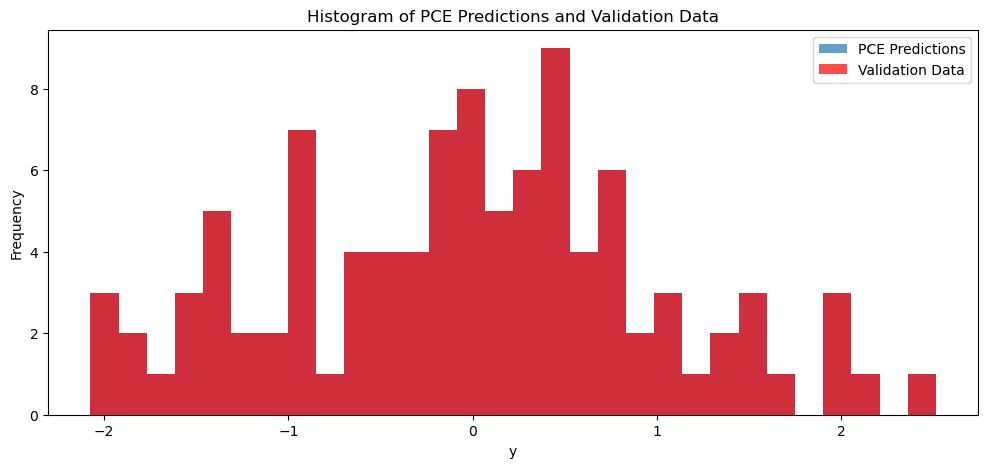

In [11]:
n_val = 100
X_val = np.random.normal(0, 1, n_val)
Y_val = np.array([f_true(xv) for xv in X_val])
Y_pred = cp.call(pce_model_cp, X_val)

# Plot histograms for predictions and validation data
plt.figure(figsize=(12, 5))
plt.hist(Y_pred, bins=30, alpha=0.7, label="PCE Predictions")
plt.hist(Y_val, bins=30, alpha=0.7, label="Validation Data", color="red")
plt.title("Histogram of PCE Predictions and Validation Data")
plt.xlabel('y')
plt.ylabel('Frequency')
plt.legend()
plt.show()

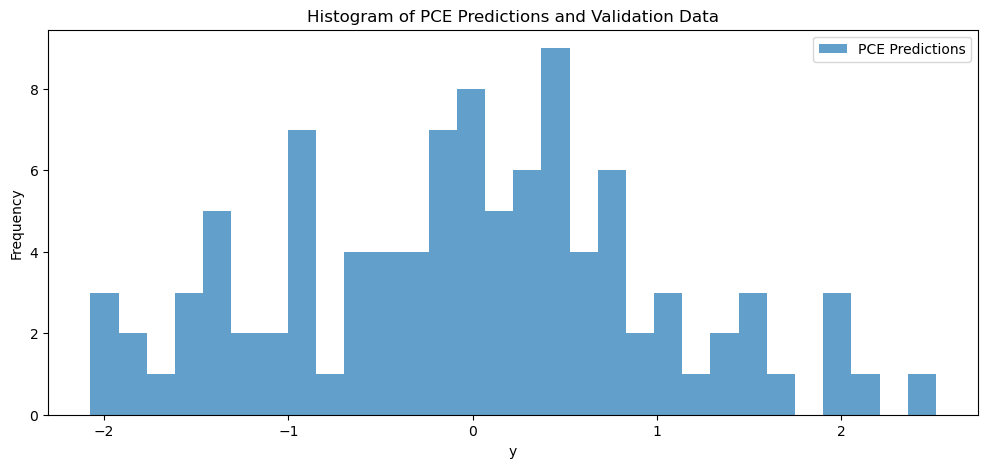

In [12]:
plt.figure(figsize=(12, 5))
plt.hist(Y_pred, bins=30, alpha=0.7, label="PCE Predictions")
plt.title("Histogram of PCE Predictions and Validation Data")
plt.xlabel('y')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [13]:
y_std_pce = np.sqrt(cp.Var(pce_model_cp, q_pce))
mean_pce_model = cp.E(pce_model_cp, q_pce)
mean_pce_model, np.sqrt(y_std_pce)

(array(7.5346e-19), 0.7598356856515928)